In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')


In [2]:
bank_data = pd.read_excel("D:\Amir Ali\Data Science\Datasets projects\BankMarketingData.xlsx")
bank_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
bank_data.describe(include = "all")

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647,31647,31647,31647,31647.000000,31647,31647,31647,31647.000000,31647,31647.000000,31647.000000,31647.000000,31647.000000,31647,31647
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,6842,19095,16224,31062,NaN,17584,26516,20423,NaN,9669,NaN,NaN,NaN,NaN,25929,27932
mean,22563.972162,40.957247,NaN,NaN,NaN,NaN,1363.890258,NaN,NaN,NaN,15.835466,NaN,258.113534,2.765697,39.576042,0.574272,NaN,NaN
std,13075.936990,10.625134,NaN,NaN,NaN,NaN,3028.304293,NaN,NaN,NaN,8.337097,NaN,257.118973,3.113830,99.317592,2.422529,NaN,NaN
min,2.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,11218.000000,33.000000,NaN,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,8.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,22519.000000,39.000000,NaN,NaN,NaN,NaN,450.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,33879.500000,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,318.500000,3.000000,-1.000000,0.000000,NaN,NaN


We can see there are 12 unique job, 3 different marital status, 4 type of educations.

Minimum age would be 18, Maximum age would be 95

shape of data is 31647×18.

In [4]:
#As we can see ID doesnt add any value to the dependent data, lets drop it.
bank_data.drop('ID', axis = 1, inplace = True)

In [5]:
bank_data.count()

age           31647
job           31647
marital       31647
education     31647
default       31647
balance       31647
housing       31647
loan          31647
contact       31647
day           31647
month         31647
duration      31647
campaign      31647
pdays         31647
previous      31647
poutcome      31647
subscribed    31647
dtype: int64

In [6]:
#lets check null data

bank_data.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [7]:
bank_data.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can see from 18 columns we have 7 numerical datatypea, 10 Categoricals.

In [8]:
#lets check duplicate values as well
print(bank_data.duplicated().value_counts())

False    31647
dtype: int64


In [9]:
#lets findout unique values in categorical data 
print('Jobs:\n', bank_data['job'].unique())
print('Marital\n', bank_data['marital'].unique())
print('Education\n', bank_data['education'].unique())
print('Default\n', bank_data['default'].unique())
print('Housing\n', bank_data['housing'].unique())
print('Loan\n', bank_data['loan'].unique())
print('Contact\n', bank_data['contact'].unique())
print('Poutcome\n', bank_data['poutcome'].unique())
print('poutcome',bank_data['poutcome'].unique())
print('Subscribed\n', bank_data['subscribed'].unique())

#for month it is obvious about months data

Jobs:
 ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
Marital
 ['married' 'divorced' 'single']
Education
 ['unknown' 'secondary' 'tertiary' 'primary']
Default
 ['no' 'yes']
Housing
 ['no' 'yes']
Loan
 ['no' 'yes']
Contact
 ['telephone' 'cellular' 'unknown']
Poutcome
 ['unknown' 'success' 'failure' 'other']
poutcome ['unknown' 'success' 'failure' 'other']
Subscribed
 ['no' 'yes']


In [10]:
#Lets analysis age data
print('Minimum age: ', bank_data['age'].min())
print('Maximum age: ', bank_data['age'].max())
#which was cleared in describ as well

Minimum age:  18
Maximum age:  95


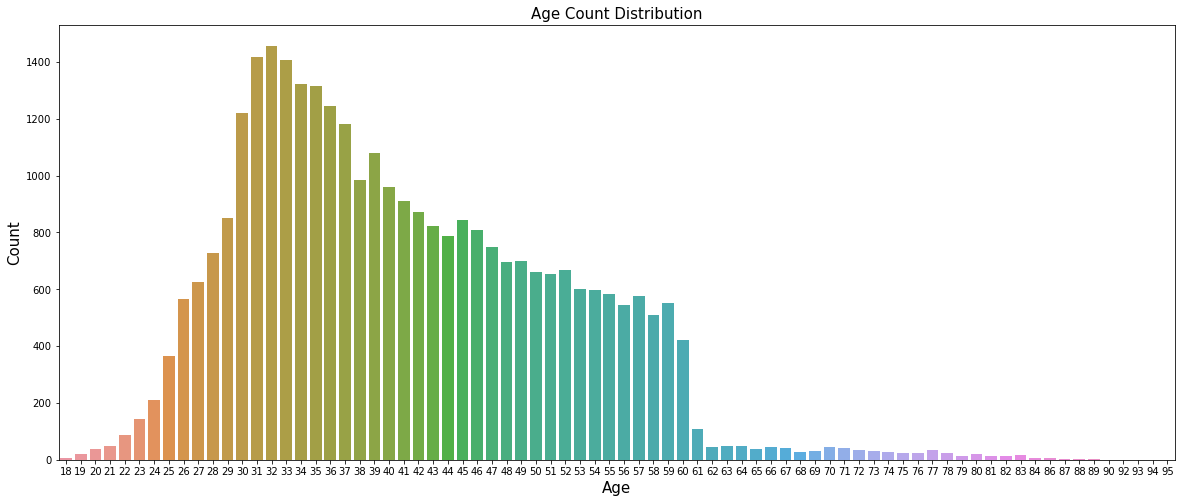

In [11]:
#lets find  age distribution plot

fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'age', data = bank_data)
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Age Count Distribution', fontsize = 15)
plt.show()

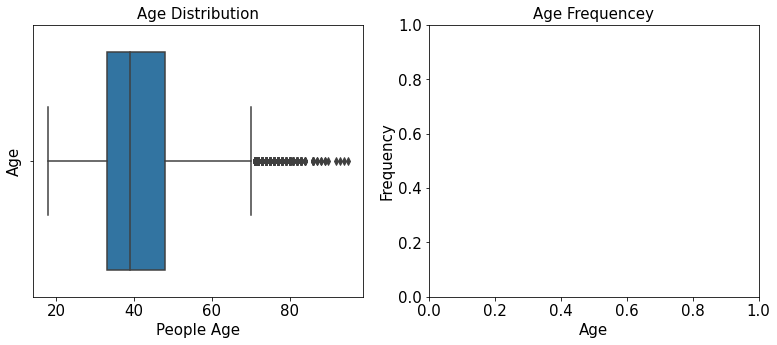

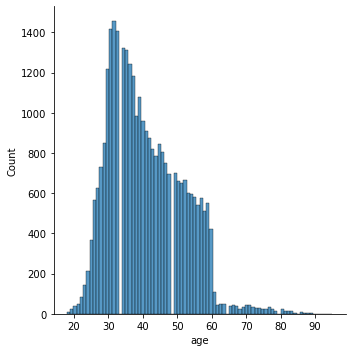

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot( x = 'age', data = bank_data, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize = 15)
ax1.set_ylabel('Age', fontsize = 15)
ax1.set_title('Age Distribution', fontsize = 15)
ax1.tick_params(labelsize=15)


sns.displot(bank_data['age'], ax= ax2)
#sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize = 15)
ax2.set_ylabel('Frequency', fontsize = 15)
ax2.set_title('Age Frequencey', fontsize = 15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 


In [13]:
#Quartiles
print('1st Quartile: ', bank_data['age'].quantile(q = 0.25))
print('2ns Quartile: ', bank_data['age'].quantile(q = 0.50))
print('3rd Quartile: ', bank_data['age'].quantile(q = 0.75))
print('4th Quartile: ', bank_data['age'].quantile(q = 1.00))

# interquartile = 3rd Quartile - 1st Quartile
 
IQR = bank_data['age'].quantile(q = 0.75) - bank_data['age'].quantile(q = 0.25)
print('InterQuartile IQR : ',IQR)

# lower range = 1st Quartile  - 1.5 * IQR
lower = bank_data['age'].quantile(q = 0.25) - 1.5 * IQR
# upper range = 3rd Quartile + 1.5 * IQR
upper = bank_data['age'].quantile ( q = 0.75) + 1.5 * IQR

print('Age above: ', upper, ' are outliers')

1st Quartile:  33.0
2ns Quartile:  39.0
3rd Quartile:  48.0
4th Quartile:  95.0
InterQuartile IQR :  15.0
Age above:  70.5  are outliers


In [14]:
# Lets find number of outliers
number_outlrs = bank_data[bank_data['age']>70]['age'].count()
print(number_outlrs)
number_of_clients = len(bank_data)
print(number_of_clients)
percent_outlrs = round(bank_data[bank_data['age']>70]['age'].count()*100/len(bank_data),2)
print('Outliers are ', percent_outlrs, "%")

349
31647
Outliers are  1.1 %


Lets do some analysis on Job variable

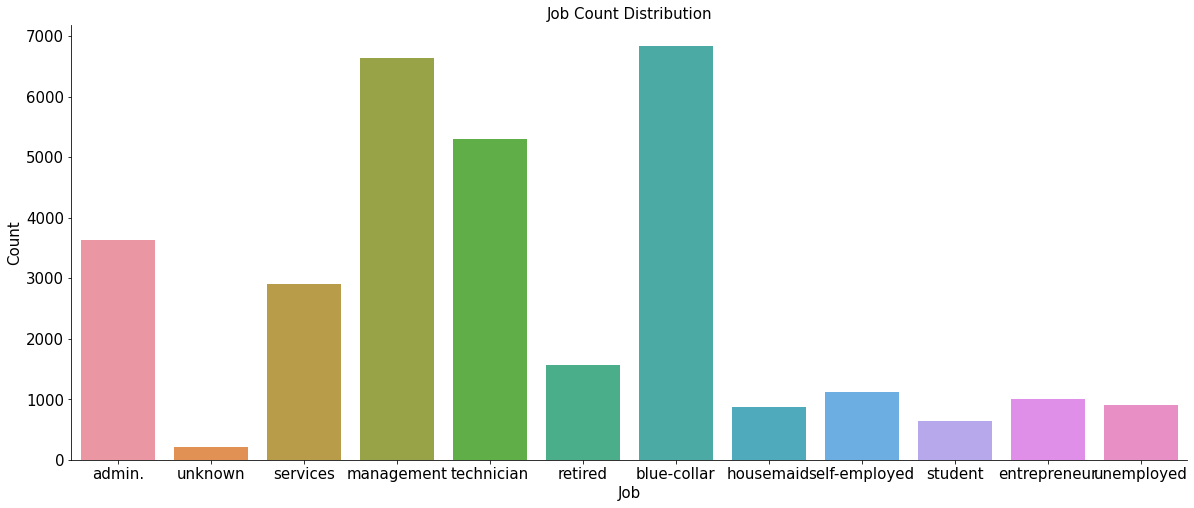

In [15]:
#lets find countplot for job variable
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.countplot(x = 'job', data = bank_data)
ax.set_xlabel('Job', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Job Count Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine()

Marital 

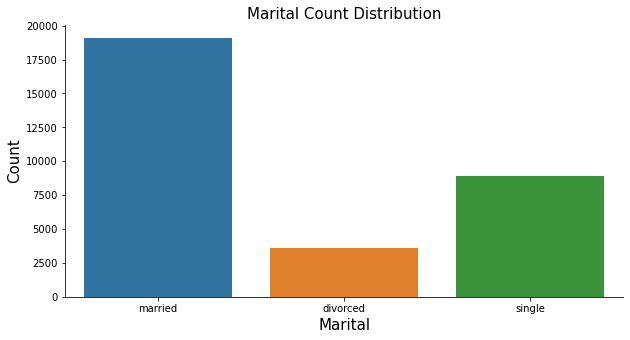

In [16]:
# Lets find countplot for Marital variable
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_data)
ax.set_xlabel('Marital', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Marital Count Distribution', fontsize = 15)
sns.despine()

Education

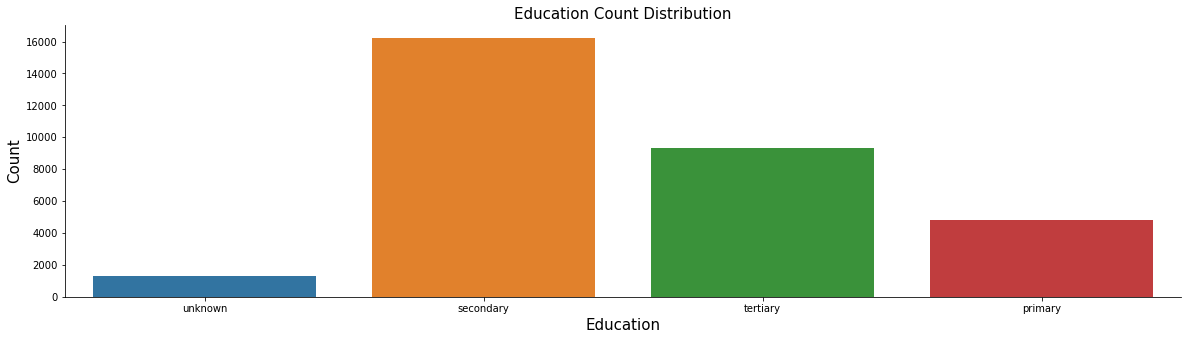

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
sns.countplot(x = 'education', data = bank_data)
ax.set_xlabel('Education', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Education Count Distribution', fontsize = 15)
sns.despine()

DEFAULT, HOUSING, LOAN

Text(0, 0.5, 'Count')

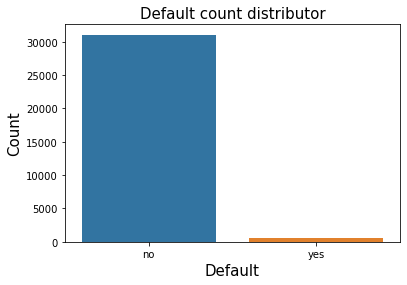

In [18]:
fig, ax1 = plt.subplots()
sns.countplot(x = 'default', data = bank_data, ax = ax1)
ax1.set_title('Default count distributor', fontsize = 15)
ax1.set_xlabel('Default', fontsize = 15)
ax1.set_ylabel('Count', fontsize = 15)

Text(0, 0.5, 'Count')

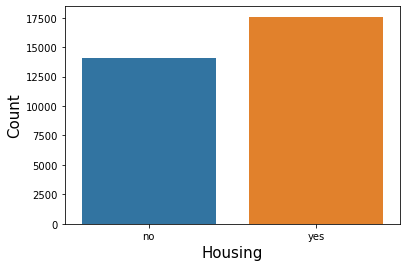

In [19]:
fig, ax2 = plt.subplots()
sns.countplot(x = 'housing', data = bank_data, ax = ax2)
ax2.set_xlabel('Housing', fontsize = 15)
ax2.set_ylabel('Count', fontsize = 15)
#ax2.set_title('Housing count distributor', fontsize = 15)

Text(0.5, 1.0, 'Loan count distribution')

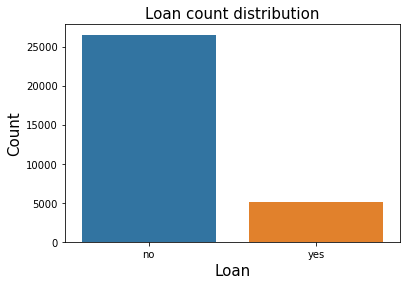

In [20]:
fig, ax3 = plt.subplots()
sns.countplot(x = 'loan', data = bank_data, ax = ax3)
ax3.set_xlabel('Loan', fontsize = 15)
ax3.set_ylabel('Count', fontsize = 15)
ax3.set_title('Loan count distribution', fontsize = 15)

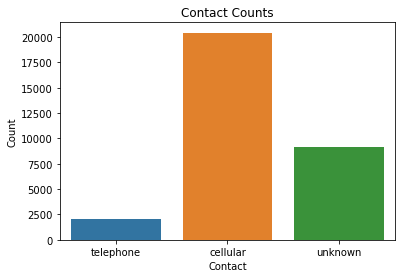

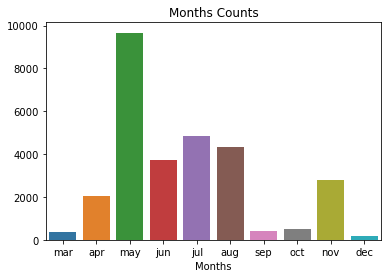

In [21]:
fig, ax1 = plt.subplots()
sns.countplot(bank_data['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

fig, ax2 = plt.subplots()
sns.countplot(bank_data['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)



plt.subplots_adjust(wspace=0.25)

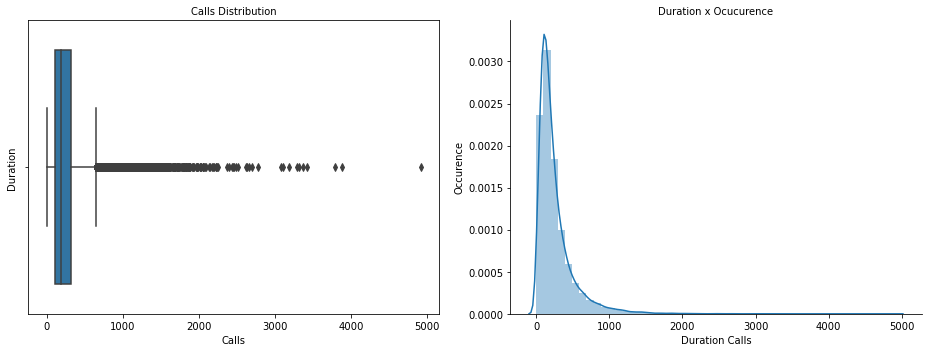

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_data, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_data['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

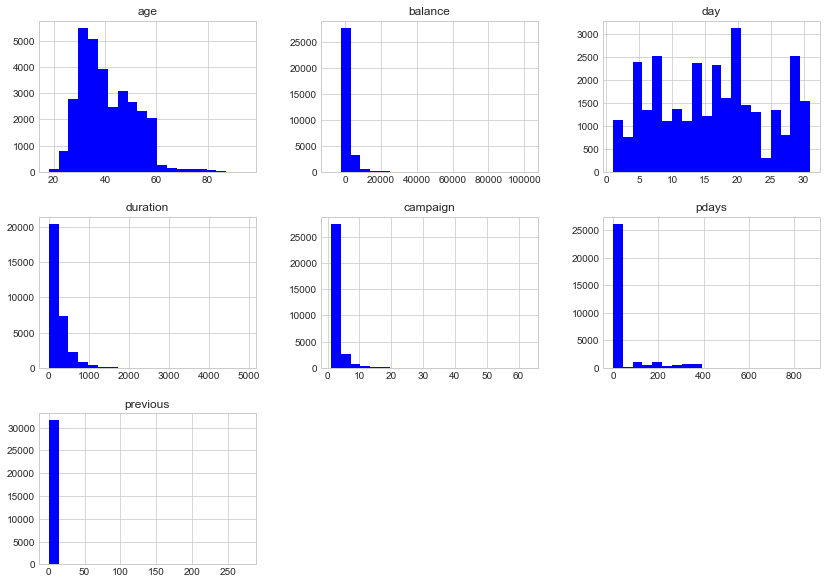

In [23]:
#lets find the distribution of the data
plt.style.use('seaborn-whitegrid')
bank_data.hist(bins = 20, figsize = (14,10), color = 'blue')
plt.show()

In [24]:
#Lets group the data with "subscribed" column to check number of "Yes" and "No"

bank_data.groupby("subscribed").size()

subscribed
no     27932
yes     3715
dtype: int64

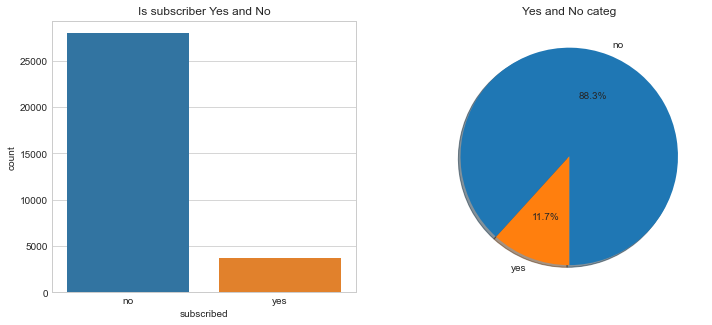

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='subscribed',data=bank_data)
plt.title("Is subscriber Yes and No")
plt.subplot(1,2,2)
labels =bank_data['subscribed'].value_counts(sort = True).index
sizes = bank_data['subscribed'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Yes and No categ',size = 12)
plt.show()

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.103245 -0.011056 -0.003870  0.005733 -0.021947  0.005761
balance   0.103245  1.000000  0.003461  0.024274 -0.012032  0.001789  0.013843
day      -0.011056  0.003461  1.000000 -0.032288  0.159168 -0.087626 -0.048752
duration -0.003870  0.024274 -0.032288  1.000000 -0.080305  0.000529  0.001783
campaign  0.005733 -0.012032  0.159168 -0.080305  1.000000 -0.087570 -0.033151
pdays    -0.021947  0.001789 -0.087626  0.000529 -0.087570  1.000000  0.428938
previous  0.005761  0.013843 -0.048752  0.001783 -0.033151  0.428938  1.000000


<AxesSubplot:>

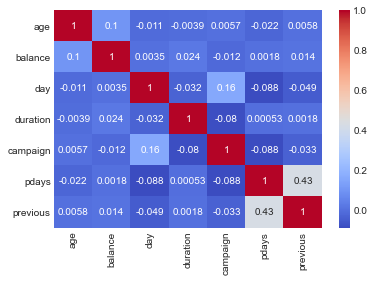

In [26]:
# Lets check the correlation of the data using heatmap
corr = bank_data.corr()
print(corr)
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

# Lets do categorical data treatment

Jobs, Marital, Education, Default, Housing, Loan. Converting to continuous due the feature scaling will be apllied later

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

bank_data['job'] = labelencoder_X.fit_transform(bank_data['job'])
bank_data['marital'] = labelencoder_X.fit_transform(bank_data['marital'])
bank_data['education'] = labelencoder_X.fit_transform(bank_data['education'])
bank_data['default'] = labelencoder_X.fit_transform(bank_data['default'])
bank_data['housing'] = labelencoder_X.fit_transform(bank_data['housing'])
bank_data['loan'] = labelencoder_X.fit_transform(bank_data['loan'])
bank_data['contact'] = labelencoder_X.fit_transform(bank_data['contact'])
bank_data['month'] = labelencoder_X.fit_transform(bank_data['month'])
bank_data['poutcome'] = labelencoder_X.fit_transform(bank_data['poutcome'])
bank_data['subscribed'] = labelencoder_X.fit_transform(bank_data['subscribed'])

bank_data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0


In [29]:
# Lets divide the data into independent and dependent variable
X = bank_data.iloc[:,0:-1]
Y = bank_data.iloc[:,-1]
print(X.shape)
print(Y.shape)


(31647, 16)
(31647,)


In [30]:
X.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3


In [31]:
Y.head(1)

0    0
Name: subscribed, dtype: int32

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [33]:
X_train.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
18283,56,5,0,1,0,-890,1,0,0,10,5,467,1,-1,0,3
12589,75,5,1,1,0,291,0,0,0,12,1,350,1,182,2,2


In [34]:
Y_train.head(1)
# Y_test.head(1)

18283    0
Name: subscribed, dtype: int32

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [36]:
bank_test_data = pd.read_excel("D:\Amir Ali\Data Science\Datasets projects\BankTestData.xlsx")
bank_test_data
# bank_data = pd.read_excel("D:\Amir Ali\Data Science\Datasets projects\BankMarketingData.xlsx")
# bank_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [37]:
# Lets drop ID first
bank_test_data.drop('ID', axis = 1, inplace = True)
bank_test_data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown


In [38]:
print(bank_test_data.shape)

(13564, 16)


Lets do a categorical treatment for test data

In [39]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

bank_test_data['job'] = labelencoder_X.fit_transform(bank_test_data['job'])
bank_test_data['marital'] = labelencoder_X.fit_transform(bank_test_data['marital'])
bank_test_data['education'] = labelencoder_X.fit_transform(bank_test_data['education'])
bank_test_data['default'] = labelencoder_X.fit_transform(bank_test_data['default'])
bank_test_data['housing'] = labelencoder_X.fit_transform(bank_test_data['housing'])
bank_test_data['loan'] = labelencoder_X.fit_transform(bank_test_data['loan'])
bank_test_data['contact'] = labelencoder_X.fit_transform(bank_test_data['contact'])
bank_test_data['month'] = labelencoder_X.fit_transform(bank_test_data['month'])
bank_test_data['poutcome'] = labelencoder_X.fit_transform(bank_test_data['poutcome'])

bank_test_data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3


# Model Building

In [40]:
#Lets import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [41]:
#Linear Regression
lr = LinearRegression() # instance
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test, Y_test)
print('Linear Regression Score : ', lr_score)


#Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
dt_score = dt.score(X_test, Y_test)
print('Decision Tree Score : ',dt_score)

# KNeighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, Y_test)
print('KNeighbors Regressor : ', knn_score)

Linear Regression Score :  0.22516495365487865
Decision Tree Score :  -0.26695220814869103
KNeighbors Regressor :  0.20553200274492


Predict data with Test file

In [42]:
print(lr.predict(bank_test_data))
print(dt.predict(bank_test_data))
print(knn.predict(bank_test_data))

[ 3.58959452 64.52735616 83.72615369 ... 18.77811094 33.20726115
 58.67261162]
[0. 0. 0. ... 0. 0. 1.]
[0.2 0.2 0.2 ... 0.2 0.2 0.2]


# Model Evaluation

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
# Linear Regression
print('Linear Regression')

print('Mean Squared Error : ', mean_squared_error(Y_test, lr_pred))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, lr_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(Y_test, lr_pred)))
print('R2 Score : ', r2_score(Y_test, lr_pred))

Linear Regression
Mean Squared Error :  0.07980412872381062
Mean Absolute Error :  0.1774980179644718
Root Mean Squared Error :  0.2824962455039193
R2 Score :  0.22516495365487865


In [45]:
#Decision Tree Regressor

print('Decision Tree Regressor')
print('Mean Squared Error : ', mean_squared_error(Y_test, dt_pred))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, dt_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(Y_test, dt_pred)))
print('R2 Score : ', r2_score(Y_test, dt_pred))

Decision Tree Regressor
Mean Squared Error :  0.13048973143759873
Mean Absolute Error :  0.13048973143759873
Root Mean Squared Error :  0.36123362445597273
R2 Score :  -0.26695220814869103


In [46]:
#KNeighbors Regressor
print('KNeighbors Regressor')
print('Mean Squared Error : ', mean_squared_error(Y_test, knn_pred))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, knn_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(Y_test, knn_pred)))
print('R2 Score : ', r2_score(Y_test, knn_pred))

KNeighbors Regressor
Mean Squared Error :  0.081826224328594
Mean Absolute Error :  0.13203791469194312
Root Mean Squared Error :  0.28605283485502114
R2 Score :  0.20553200274492


# Model Tuning 

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#lets create and fit Ridge Regression model testing each alpha
alphavalue = {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model = Ridge()

grid = GridSearchCV(estimator = model, param_grid = alphavalue)

grid.fit(X_train, Y_train)
print(grid)

#lets summarize the results of the grid search

print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.19844963909908298
1
{'alpha': 1}


In [48]:
rd = Ridge(alpha = 0.1)
rd.fit(X_train,Y_train)
print(rd.coef_)
print('Score: ',rd.score(X_train, Y_train))

[ 0.00671891  0.00356046  0.01024903  0.01163553 -0.00096772  0.00662196
 -0.04314034 -0.01748532 -0.03437178 -0.00383166  0.01362241  0.12191801
 -0.00936789  0.04681165  0.01499801  0.02836079]
Score:  0.20418247631111053


In [49]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')  

knn_params = {"n_neighbors": np.arange(1, 50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=2)
knn_cv_model.fit(X_train, Y_train)
print("Best Parameters: " + str(knn_cv_model.best_params_))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed: 30.5min finished


Best Parameters: {'n_neighbors': 25}
